   Unnamed: 0  Class  Feature 0  Feature 1
0           0      1  -0.194346   1.171631
1           1      1  -0.136906   1.493444
2           2      1   0.103492  -0.570624
3           3      1   1.032033  -1.329842
4           4      0  -0.290103   0.627492


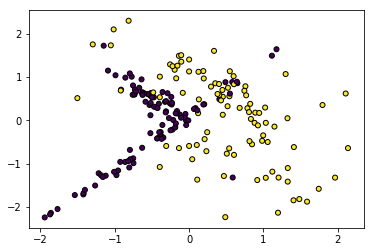

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import svm


student_identity = 'koustubha26'

filenameToRead = '5challenge_training_' + student_identity + '.csv'
training_df = pd.read_csv('C:/Users/KKR/Desktop/ECEN689-Fall2018-master/Challenges/5Files/' + filenameToRead)
testing_df = pd.read_csv('C:/Users/KKR/Desktop/ECEN689-Fall2018-master/Challenges/5Files/' + '5challenge_testing_koustubha26.csv')

print(training_df.head())

x1 = training_df[['Feature 0', 'Feature 1']].values
y1 = training_df[['Class']].values
plt.scatter(x1[:, 0], x1[:, 1], marker='o', c=y1.ravel(),
            s=25, edgecolor='k')
plt.show()

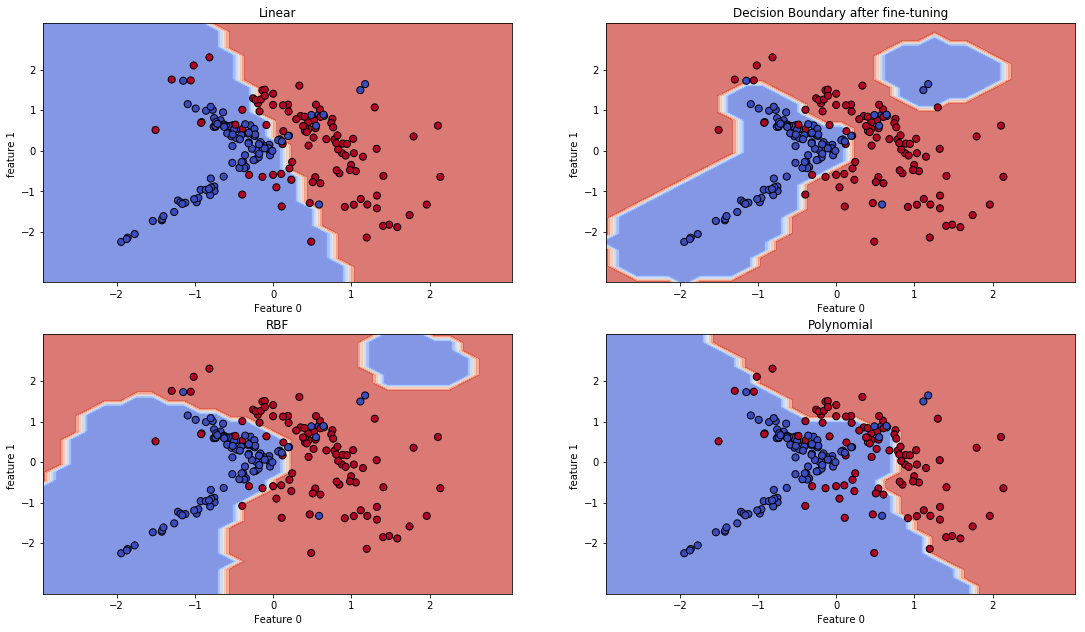

In [17]:
def meshgridcreation(x, y, h=.2):
    minval_x, maxval_x = x.min() - 1, x.max() + 1
    minval_y, maxval_y = y.min() - 1, y.max() + 1
    xaxis, yaxis = np.meshgrid(np.arange(minval_x, maxval_x, h),
                         np.arange(minval_y, maxval_y, h))
    return xaxis, yaxis

X = x1
y = y1.ravel()


C = 3  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          # plotting training data and decision boundary
          svm.SVC(kernel='rbf',gamma = 1.2,C = 1.8),
          svm.SVC(kernel='rbf'),
          svm.SVC(kernel='poly'))
         
                  
models = [clf.fit(X, y) for clf in models]
scores = [clf.score(X,y) for clf in models]


# title for the plots
titles = ('Linear',
          'Decision Boundary after fine-tuning',
          'RBF',
          'Polynomial')

### code to plot the scatter plot with decision boundary
figure, sub = plt.subplots(2, 2)
figure.set_size_inches(18.5, 10.5)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
X0, X1 = X[:, 0], X[:, 1]
xaxis, yaxis = make_meshgrid(X0, X1)
for clf, title, ax in zip(models, titles, sub.flatten()):
    Z = clf.predict(np.c_[xaxis.ravel(), yaxis.ravel()])
    Z = Z.reshape(xaxis.shape)
    out = ax.contourf(xaxis, yaxis, Z,cmap=plt.cm.coolwarm, alpha=0.7)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    ax.set_xlim(xaxis.min(), xaxis.max())
    ax.set_ylim(yaxis.min(), yaxis.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('feature 1 ')
    ax.set_xticks([i for i in range(-2,3)])
    ax.set_yticks([i for i in range(-2,3)])
    ax.set_title(title)

plt.show()

In [19]:
print(scores)

[0.82, 0.925, 0.89, 0.765]


In [20]:
rbf_classifier = svm.SVC(kernel = 'rbf')
rbf_classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
values_C =np.linspace(0.1,10,100)
values_gamma=np.linspace(0.1,10,10)
hyper_params = [{'C': values_C, 'gamma':values_gamma}]
scoring_array = ['accuracy','f1','average_precision']
all_scoring_kernel_hyperparameters = []
for i in scoring_array:
    optimising = GridSearchCV(estimator =rbf_classifier,
                               param_grid = hyper_params,
                               scoring = i,
                               cv = None)
    fit = optimising.fit(X, y)
    all_scoring_kernel_hyperparameters.append([fit.best_score_,fit.best_params_,i])   
    
    
print(all_scoring_kernel_hyperparameters)

[[0.915, {'C': 0.6, 'gamma': 8.9}, 'accuracy'], [0.9108554778554779, {'C': 0.6, 'gamma': 8.9}, 'f1'], [0.952789388186464, {'C': 9.3, 'gamma': 1.2000000000000002}, 'average_precision']]


In [22]:
rbf_classifier= svm.SVC(kernel = 'rbf',C=1.8,gamma = 1.2)
rbf_classifier.fit(X,y)
rbf_classifier.score(X,y)

0.925

In [23]:
testing_data = testing_df.iloc[:,2:]

In [24]:
testing_df['Class'] = rbf_classifier.predict(testing_data)

In [25]:
testing_df = testing_df.iloc[:,1:]

In [26]:
testing_df.head()

,Class,Feature 0,Feature 1
0,1,0.428542,0.738597
1,0,-0.770311,0.769582
2,1,-0.039042,1.261099
3,0,-0.524402,1.055386
4,0,-0.274202,0.490807


In [31]:
testing_df.to_csv('C:/Users/KKR/Desktop/ECEN689-Fall2018-master/Challenges/5Files/5challenge_testing_koustubha26.csv')